<a href="https://colab.research.google.com/github/s11000/pandas-data-frame/blob/main/%20KALMAN%20FILTER%202-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from filterpy.kalman import KalmanFilter
f = KalmanFilter (dim_x=2, dim_z=1)

In [2]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=d6ceafa791b2c7144759e9099a3c5023002ec19ee89e5396ebf6fa1ceea99649
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


In [3]:
from filterpy.kalman import KalmanFilter
f = KalmanFilter (dim_x=2, dim_z=1)
# This should now work without raising an error

In [6]:
import numpy as np  # Import NumPy

f.x = np.array([[2.],    # position
                [0.]])   # velocity

In [7]:
f.x = np.array([2., 0.])

In [8]:
f.F = np.array([[1.,1.],
                [0.,1.]])

In [9]:
f.H = np.array([[1.,0.]])

In [10]:
f.P *= 1000.

In [11]:
f.P = np.array([[1000.,    0.],
                [   0., 1000.] ])

In [12]:
f.R = 5

In [13]:
f.R = np.array([[5.]])

In [14]:
from filterpy.common import Q_discrete_white_noise
f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.13)

In [20]:
def get_sensor_reading():
    # Code to generate or fetch sensor readings
    # Replace this with your actual sensor reading logic
    reading = np.array([[1.2]])  # Example reading, now a column vector with a single element
    return reading

z = get_sensor_reading()
f.predict()
f.update(z)

# Replace with your actual function
def do_something_with_estimate(x):
    print(x)

do_something_with_estimate(f.x)

[ 1.2003998  -0.23988022]


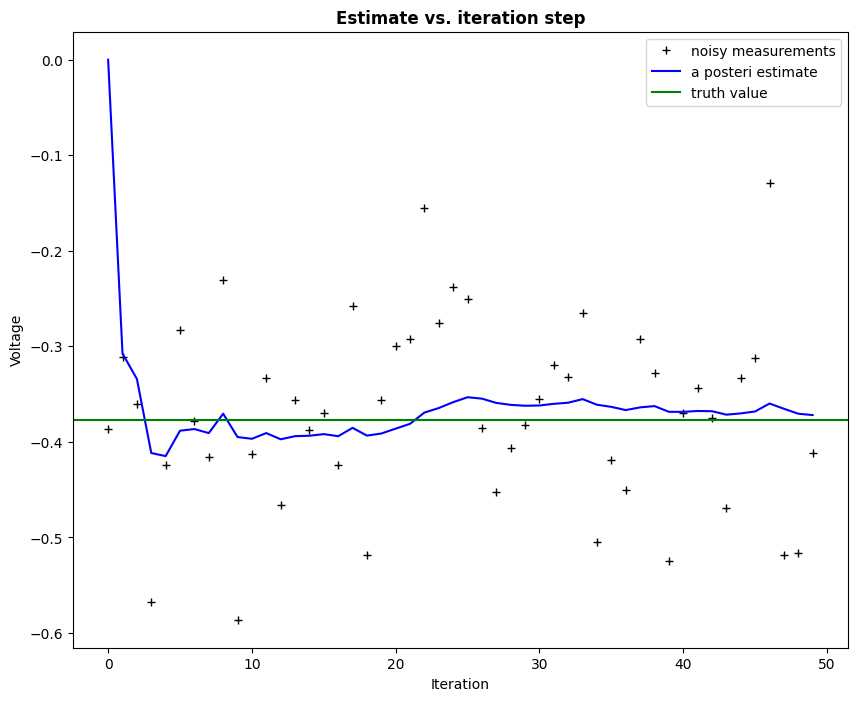

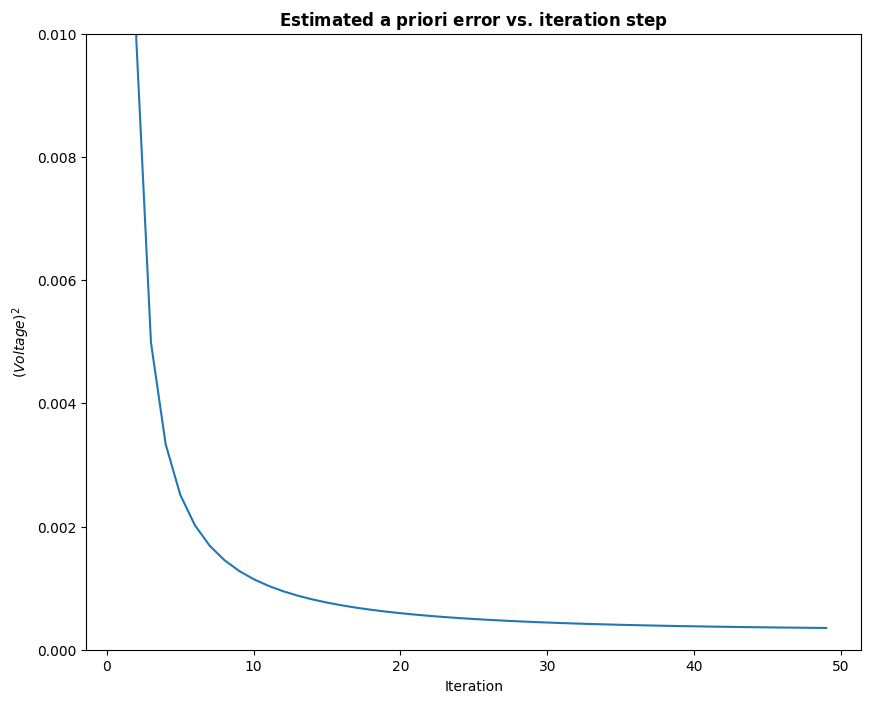

In [26]:
# Kalman filter example demo in Python

# A Python implementation of the example given in pages 11-15 of "An
# Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,
# University of North Carolina at Chapel Hill, Department of Computer
# Science, TR 95-041,
# https://www.cs.unc.edu/~welch/media/pdf/kalman_intro.pdf

# by Andrew D. Straw

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

# intial parameters
n_iter = 50
sz = (n_iter,) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()